In [355]:
import math
import sympy as sp
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

x,y,z,r,o=sp.symbols("x y z r theta")
#Tool Velocity Matrix


X_BR=sp.Matrix([[400*sp.sin((2*np.pi*o)/50)*(2*np.pi)/5],[0],[400*sp.cos((2*np.pi*o)/50)*(2*np.pi)/5],[0],[0],[0]])
X1_BR=sp.Matrix([[-320],[0],[0],[0],[0],[0]])
X_FR=sp.Matrix([[-320],[0],[0],[0],[0],[0]])
X1_FR=sp.Matrix([[320],[0],[0],[0],[0],[0]])
X_BL=sp.Matrix([[-320],[0],[0],[0],[0],[0]])
X1_BL=sp.Matrix([[-320],[0],[0],[0],[0],[0]])
X_FL=sp.Matrix([[400*sp.sin((2*np.pi*o)/50)*(2*np.pi)/5],[0],[400*sp.cos((2*np.pi*o)/50)*(2*np.pi)/5],[0],[0],[0]])
X1_FL=sp.Matrix([[-320],[0],[0],[0],[0],[0]])


file_name='front_jump_gait.json'

theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]])
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

A_i=Rot_z*Tran_z*Tran_x*Rot_x

# Back Left Leg

BL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
BL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
BL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])

# Back Right Leg
BR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,64.85)])
BR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
BR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Left Leg
FL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
FL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
FL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Right Leg
FR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,-64.85)])
FR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
FR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


T1=BR_Ad0*BR_A1
T2=BR_Ad0*BR_A1*BR_Ad1*BR_A2
T3=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3
T4=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3*BR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=BL_Ad0*BL_A1
T2=BL_Ad0*BL_A1*BL_Ad1*BL_A2
T3=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3
T4=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3*BL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FL_Ad0*FL_A1
T2=FL_Ad0*FL_A1*FL_Ad1*FL_A2
T3=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3
T4=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3*FL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FR_Ad0*FR_A1
T2=FR_Ad0*FR_A1*FR_Ad1*FR_A2
T3=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3
T4=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3*FR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])





In [356]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_right_joint=[]
T=T4
x_tool_br=[]
y_tool_br=[]
z_tool_br=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_BR.subs(o,i)
    if i>25:
        X_eval=X1_BR.subs(o,j)
        j+=1
    back_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_br.append(T_eval[3])
    y_tool_br.append(T_eval[7])
    z_tool_br.append(T_eval[11])
    J_eval=J_BR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [357]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_right_joint=[]
T=T4
x_tool_fr=[]
y_tool_fr=[]
z_tool_fr=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_FR.subs(o,i)
    if i>25:
        X_eval=X1_FR.subs(o,j)
        j+=1
    front_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fr.append(T_eval[3])
    y_tool_fr.append(T_eval[7])
    z_tool_fr.append(T_eval[11])
    J_eval=J_FR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [358]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_left_joint=[]
T=T4
x_tool_fl=[]
y_tool_fl=[]
z_tool_fl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_FL.subs(o,i)
    if i>25:
        X_eval=X1_FL.subs(o,j)
        j+=1
    front_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fl.append(T_eval[3])
    y_tool_fl.append(T_eval[7])
    z_tool_fl.append(T_eval[11])
    J_eval=J_FL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [359]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_left_joint=[]
T=T4
x_tool_bl=[]
y_tool_bl=[]
z_tool_bl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_BL.subs(o,i)
    if i>25:
        X_eval=X1_BL.subs(o,j)
        j+=1
    back_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_bl.append(T_eval[3])
    y_tool_bl.append(T_eval[7])
    z_tool_bl.append(T_eval[11])
    J_eval=J_BL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

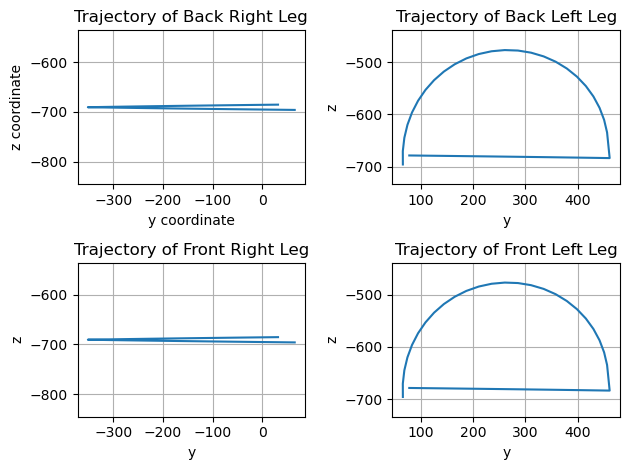

In [360]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2)

# Plot 1: Top left subplot
axs[0, 0].plot(x_tool_br, z_tool_br)
axs[0, 0].set_xlabel("y coordinate")
axs[0, 0].set_ylabel("z coordinate")
axs[0, 0].set_title("Trajectory of Back Right Leg")
axs[0, 0].axis("equal")
axs[0, 0].grid(True)

# Plot 2: Top right subplot
axs[0, 1].plot(x_tool_bl, z_tool_bl)  # Replace with your desired plot
axs[0, 1].set_xlabel("y")
axs[0, 1].set_ylabel("z")
axs[0, 1].set_title("Trajectory of Back Left Leg")
axs[0, 1].axis("equal")
axs[0, 1].grid(True)
# Add other formatting and plotting commands as needed

# Plot 3: Bottom left subplot
axs[1, 0].plot(x_tool_fr, z_tool_fr)  # Replace with your desired plot
axs[1, 0].set_xlabel("y")
axs[1, 0].set_ylabel("z")
axs[1, 0].set_title("Trajectory of Front Right Leg")
axs[1, 0].axis("equal")
axs[1, 0].grid(True)
# Add other formatting and plotting commands as needed

# Plot 4: Bottom right subplot
axs[1, 1].plot(x_tool_fl, z_tool_fl)  # Replace with your desired plot
axs[1, 1].set_xlabel("y")
axs[1, 1].set_ylabel("z")
axs[1, 1].set_title("Trajectory of Front Left Leg")
axs[1,1].axis("equal")
axs[1,1].grid(True)
# Add other formatting and plotting commands as needed

# Adjust the layout to avoid overlapping titles and labels
fig.tight_layout()

# Show the plot
plt.show()

In [361]:
front_left_joint

[[0.0, -0.7, 1.5],
 [2.10920844107693e-8, -0.735108227846018, 1.57793213143621],
 [4.53998094029623e-8, -0.763586679628283, 1.65220706403443],
 [7.35942694646058e-8, -0.784649426149904, 1.72211285698553],
 [1.06401461329381e-7, -0.797541254452395, 1.78687074865323],
 [1.44551375619526e-7, -0.801592941255934, 1.84563413977346],
 [1.88675771605676e-7, -0.796297919132879, 1.89749824393029],
 [2.39131619728067e-7, -0.781407479771501, 1.94152436382964],
 [2.95737055766451e-7, -0.757033481254323, 1.97678246506597],
 [3.57441518638802e-7, -0.723736740542878, 2.00241344514774],
 [4.22017281947999e-7, -0.682570113912189, 2.01770749463274],
 [4.85933687466772e-7, -0.635045303044944, 2.02218764023385],
 [5.44594817692500e-7, -0.583008770325821, 2.01568057161337],
 [5.93015951095628e-7, -0.528443549055993, 1.99835476043003],
 [6.26794013266551e-7, -0.473245642288958, 1.97071240767690],
 [6.43029873172478e-7, -0.419035652672836, 1.93353575963948],
 [6.40850230574224e-7, -0.367049257294852, 1.887802

In [362]:
front_right_joint

[[0.0, -0.7, 1.5],
 [-1.13099434435882e-8, -0.723013052356928, 1.50005012852982],
 [-2.27036025569893e-8, -0.745506767868113, 1.49895974526541],
 [-3.41578458478223e-8, -0.767456547736724, 1.49672837456132],
 [-4.56510898423634e-8, -0.788837639436622, 1.49335524914234],
 [-5.71634892893025e-8, -0.809625275978752, 1.48883927765579],
 [-6.86771130771827e-8, -0.829794802025259, 1.48317898930385],
 [-8.01761037630411e-8, -0.849321784288791, 1.47637245516667],
 [-9.16468195577905e-8, -0.868182103700460, 1.46841718563839],
 [-1.03077958655585e-7, -0.886352026910018, 1.45931000315011],
 [-1.14460666845659e-7, -0.903808254776668, 1.44904688902416],
 [-1.25788630453601e-7, -0.920527945595865, 1.43762280286864],
 [-1.37058157764942e-7, -0.936488710860041, 1.42503147235111],
 [-1.48268253212340e-7, -0.951668581339241, 1.41126515044915],
 [-1.59420689772524e-7, -0.966045941156322, 1.39631433631854],
 [-1.70520086237823e-7, -0.979599427280122, 1.38016745468630],
 [-1.81573997442598e-7, -0.992307791

In [363]:
back_left_joint

[[0.0, -0.7, 1.5],
 [2.10920844107693e-8, -0.735108227846018, 1.57793213143621],
 [4.53998094029623e-8, -0.763586679628283, 1.65220706403443],
 [7.35942694646058e-8, -0.784649426149904, 1.72211285698553],
 [1.06401461329381e-7, -0.797541254452395, 1.78687074865323],
 [1.44551375619526e-7, -0.801592941255934, 1.84563413977346],
 [1.88675771605676e-7, -0.796297919132879, 1.89749824393029],
 [2.39131619728067e-7, -0.781407479771501, 1.94152436382964],
 [2.95737055766451e-7, -0.757033481254323, 1.97678246506597],
 [3.57441518638802e-7, -0.723736740542878, 2.00241344514774],
 [4.22017281947999e-7, -0.682570113912189, 2.01770749463274],
 [4.85933687466772e-7, -0.635045303044944, 2.02218764023385],
 [5.44594817692500e-7, -0.583008770325821, 2.01568057161337],
 [5.93015951095628e-7, -0.528443549055993, 1.99835476043003],
 [6.26794013266551e-7, -0.473245642288958, 1.97071240767690],
 [6.43029873172478e-7, -0.419035652672836, 1.93353575963948],
 [6.40850230574224e-7, -0.367049257294852, 1.887802

In [364]:
back_right_joint

[[0.0, -0.7, 1.5],
 [-1.13099434435882e-8, -0.723013052356928, 1.50005012852982],
 [-2.27036025569893e-8, -0.745506767868113, 1.49895974526541],
 [-3.41578458478223e-8, -0.767456547736724, 1.49672837456132],
 [-4.56510898423634e-8, -0.788837639436622, 1.49335524914234],
 [-5.71634892893025e-8, -0.809625275978752, 1.48883927765579],
 [-6.86771130771827e-8, -0.829794802025259, 1.48317898930385],
 [-8.01761037630411e-8, -0.849321784288791, 1.47637245516667],
 [-9.16468195577905e-8, -0.868182103700460, 1.46841718563839],
 [-1.03077958655585e-7, -0.886352026910018, 1.45931000315011],
 [-1.14460666845659e-7, -0.903808254776668, 1.44904688902416],
 [-1.25788630453601e-7, -0.920527945595865, 1.43762280286864],
 [-1.37058157764942e-7, -0.936488710860041, 1.42503147235111],
 [-1.48268253212340e-7, -0.951668581339241, 1.41126515044915],
 [-1.59420689772524e-7, -0.966045941156322, 1.39631433631854],
 [-1.70520086237823e-7, -0.979599427280122, 1.38016745468630],
 [-1.81573997442598e-7, -0.992307791